In [6]:
import numpy as np
from numpy import arange
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import ElasticNet,ElasticNetCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
import warnings
warnings.filterwarnings(action='ignore')


In [7]:
house = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                     'python-machine-learning-book-2nd-edition'
                     '/master/code/ch10/housing.data.txt',header=None,sep='\s+')
house.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS','NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
house.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [8]:
house.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


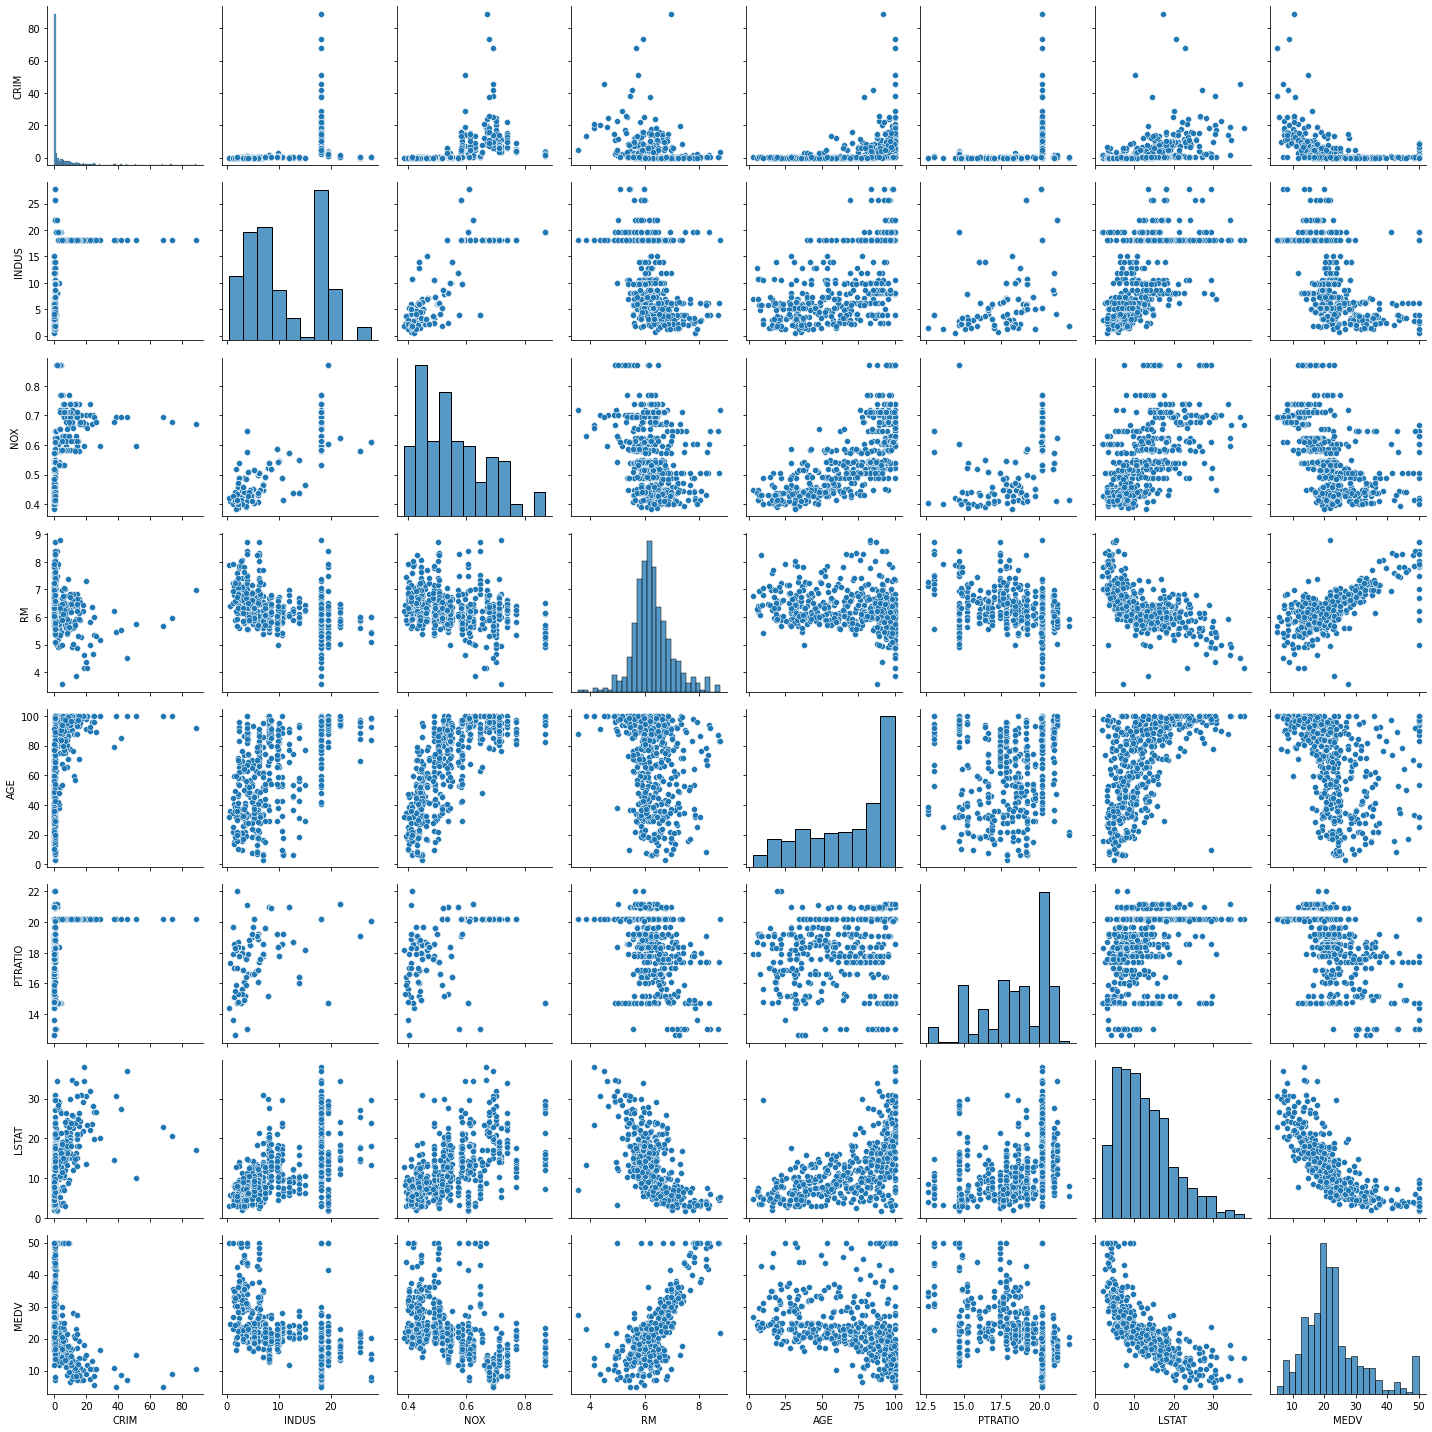

In [4]:
cols=['CRIM','INDUS','NOX','RM', 'AGE','PTRATIO', 'LSTAT', 'MEDV']
sns.pairplot(house[cols],height=2.5)
plt.tight_layout()
plt.show()

기울기 : -0.377
절편: -0.000


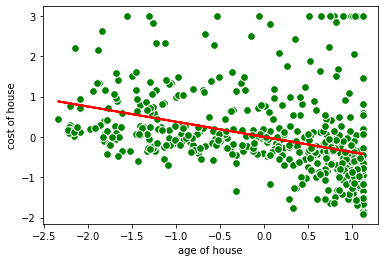

In [7]:
x=house[['AGE']].values
y=house[['MEDV']].values
model=LinearRegression()
sc_x=StandardScaler()
sc_y=StandardScaler()
x_std=sc_x.fit_transform(x)
y_std=sc_y.fit_transform(y[:np.newaxis]).flatten()
model.fit(x_std,y_std)
print('기울기 : %.3f'%model.coef_[0])
print('절편: %.3f'%model.intercept_)
def lin_regplot(x,y,model):
    plt.scatter(x,y,c='g', edgecolors='w',s=60)
    plt.plot(x, model.predict(x), color='r', lw=2)
    
lin_regplot(x_std, y_std, model)
plt.xlabel('age of house')
plt.ylabel('cost of house')
plt.show()


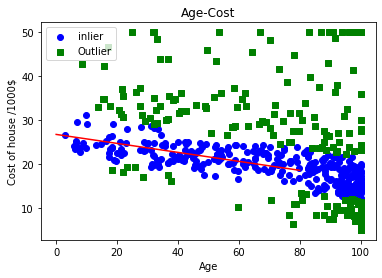

기울기 :-0.102, 절편: 26.741


In [11]:
X=house[['AGE']].values
y=house['MEDV'].values

ransac=RANSACRegressor(LinearRegression(),max_trials=100,min_samples=50,
                      residual_threshold=5,random_state=2021)

ransac.fit(X,y)
inlier_mask=ransac.inlier_mask_
outlier_mask=np.logical_not(inlier_mask)

line_X=np.arange(0,100,20)
line_y_ransac=ransac.predict(line_X[:,np.newaxis])
plt.scatter(X[inlier_mask],y[inlier_mask], c='blue', marker='o',label='inlier')
plt.scatter(X[outlier_mask],y[outlier_mask], c='green', marker='s',label='Outlier')

plt.plot(line_X,line_y_ransac,c='red')
plt.xlabel('Age')
plt.ylabel('Cost of house /1000$')
plt.title('Age-Cost')
plt.legend(loc=2)
plt.show()


slope=ransac.estimator_.coef_[0]
intercept= ransac.estimator_.intercept_
print('기울기 :%0.3f, 절편: %0.3f' %(slope,intercept))



In [32]:
X=house[['AGE']].values
y=house['MEDV'].values
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=2021)

model= ElasticNet()
cv=RepeatedKFold(n_splits=10, n_repeats=3, random_state=2021)
grid=dict()
grid['alpha']=[1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
grid['l1_ratio']=arange(0,1,0.01)
search=ElasticNetCV(grid,cv=cv)
results=search.fit(x_train,y_train)

print('MAE: %.3f'%results.best_score_)
print('config:%s'%results.best_params_)


MAE: -6.230
config:{'alpha': 0.0, 'l1_ratio': 0.0}


In [12]:
X=house[['AGE','CRIM']].values
y=house['MEDV'].values
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=2021)

model= ElasticNet()
cv=RepeatedKFold(n_splits=10, n_repeats=3, random_state=2021)
grid=dict()
grid['alpha']=[1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
grid['l1_ratio']=arange(0,1,0.01)
search=GridSearchCV(model, grid,scoring='neg_mean_absolute_error',cv=cv,n_jobs=-1)
results=search.fit(x_train,y_train)

print('MAE: %.3f'%results.best_score_)
print('config:%s'%results.best_params_)



MAE: -6.048
config:{'alpha': 10.0, 'l1_ratio': 0.04}


In [ ]:
plt.figure(figsize=(20,10))
plt.plot(k_list, cv_scores, marker='o', linestyle='dashed')
plt.legend(['Cross validation scores'], fontsize=20)
plt.xlabel('k v', fontsize=20)
plt.ylabel('Accuracy', fontsize=25)
plt.axvline(best_k[0], color='r', linestyle='--', linewidth=2)
plt.show()